#### Assignment 2
##### Name     - L.H.N. WIJEWARDENA
##### Index No - 190713X

Question 1

x =  0.11558659225671694
y =  0.13432119963749667
r =  10.150921733632586


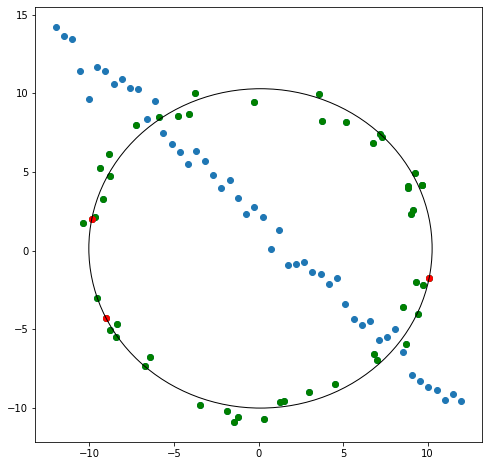

In [19]:
import cv2 as cv
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import random
import matplotlib.pyplot as plt

N = 100

half_n = N//2
r = 10
s = r /16
t = np.random.uniform(0 , 2*np.pi , half_n)
n = s*np.random.randn (half_n)

x , y = (r+n)*np.cos(t) , (r+n)*np.sin(t)
X_circ = np.hstack ((x.reshape(half_n , 1) , y.reshape(half_n , 1)))

m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn(half_n)
X_line = np . hstack (( x.reshape (half_n , 1) , y.reshape(half_n , 1)))

X = np.vstack((X_circ , X_line))


def random_sample(list):
    sample_list = []
    rand_nums = random.sample(range(1, len(list)), 3)
    for i in rand_nums:
        sample_list.append((list[i][0], list[i][1]))
    return sample_list

def model(sample):
	
    p1 = sample[0]
    p2 = sample[1]
    p3 = sample[2]

    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, np.inf)

    # Center of circle
    c_x = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    c_y = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    r = np.sqrt((c_x - p1[0])**2 + (c_y - p1[1])**2)
    
    return c_x, c_y, r

def inliers(x_data, y_data, c_x, c_y, r):
    inliers = []
    d = r + r//5

    for i in range(len(x_data)):
        dis = np.sqrt((x_data[i]-c_x)**2 + (y_data[i]-c_y)**2)
        if dis < d:
            inliers.append(i)

    return inliers


max_inliers = []
x_data = X_circ[:,0]
y_data = X_circ[:,1]
radius = 0
center_x = 0
center_y = 0

for i in range(0,1000):
    sample_list = random_sample(X_circ)
    c_x, c_y, r = model(sample_list)
   
    inlier_list = inliers(x_data, y_data, c_x, c_y, r)
    if len(inlier_list)>len(max_inliers):
        max_inliers = inlier_list
        radius = r
        center_x = c_x
        center_y = c_y
        samples = sample_list

#print(max_inliers)
print("x = " ,center_x)
print("y = " ,center_y)
print("r = " ,radius)

plt.figure(figsize=(8,8))
circle = plt.Circle(( center_x , center_y ), radius, fill=False )
fig = plt.gcf()
ax = fig.gca() 
ax.add_patch(circle)  
plt.scatter(X[:,0],X[:,1])
for i in max_inliers:
    plt.scatter(X[i][0],X[i][1] , c = "g")

plt.scatter([samples[0][0], samples[1][0], samples[2][0]] , [samples[0][1], samples[1][1], samples[2][1]] , c ="r")

Question 2

In [9]:
# Function to find the points in the image using left mouse click

def click(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, " ", y)


In [29]:
img1 = cv.imread("002.jpg")
assert img1 is not None
cv.imshow("Image 1",img1)
cv.setMouseCallback("Image 1",click)
cv.waitKey(0)

img2 = cv.imread("Flag_of_the_United_Kingdom.svg.png")
assert img2 is not None
cv.imshow("Image 2",img2)
cv.setMouseCallback("Image 2",click)
cv.waitKey(0)
cv.destroyAllWindows()

117   233
94   536
539   307
536   542


Text(0.5, 1.0, 'Image warpped')

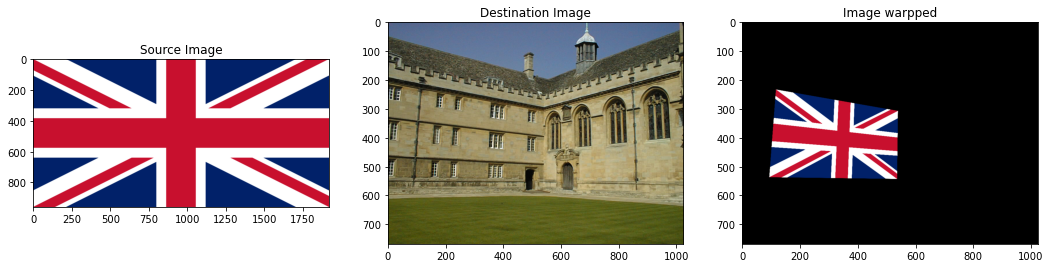

In [66]:

img_dst = cv.imread('002.jpg')
# Four corners in the destination image
pts_dst = np.array([[117, 233], [94, 536], [539, 307],[536, 542]])

img_src = cv.imread('Flag_of_the_United_Kingdom.svg.png')
# Four corners in the source image.
pts_src = np.array([[0, 0],[0, 958],[1919, 0],[1919, 958]])

# Calculate Homography
h, status = cv.findHomography(pts_src, pts_dst)

# Warp source image to destination based on homography
img_out = cv.warpPerspective(img_src, h, (img_dst.shape[1],img_dst.shape[0]))

ig,ax=plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(cv.cvtColor(img_src,cv.COLOR_BGR2RGB))
ax[0].set_title("Source Image")
ax[1].imshow(cv.cvtColor(img_dst,cv.COLOR_BGR2RGB))
ax[1].set_title("Destination Image")
ax[2].imshow(cv.cvtColor(img_out,cv.COLOR_BGR2RGB))
ax[2].set_title("Image warpped")


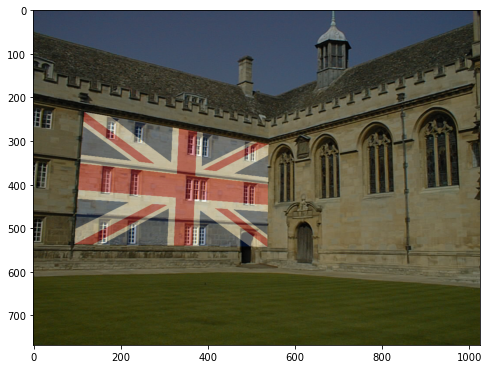

In [67]:
# Blending Images
alpha = 0.65
beta = 1-alpha

blended_1 = cv.addWeighted(img_dst, alpha, img_out, beta, 0.0)
fig, ax = plt.subplots(1,1,figsize= (8,8))
ax.imshow(cv.cvtColor(blended_1,cv.COLOR_BGR2RGB))

Question 3

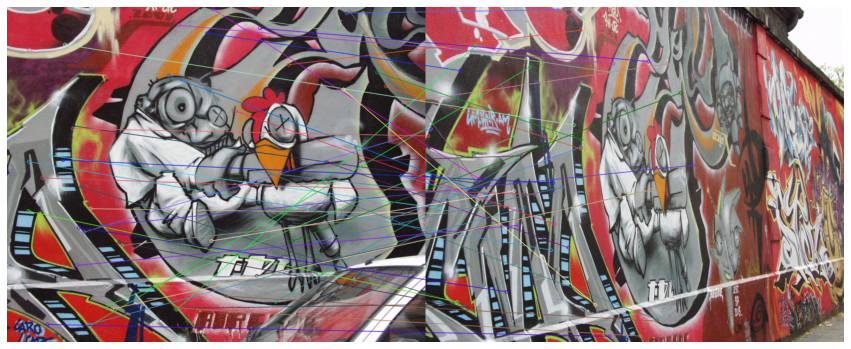

In [68]:
#Match sift features
img1 = cv.imread('img1.ppm')  
img2 = cv.imread('img5.ppm')

sift = cv.SIFT_create()
keypoint_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoint_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
#sorting to get the best matches
matches = sorted(matches, key = lambda x:x.distance)

fig, ax = plt.subplots(figsize = (15,15))
ax.axis('off')
matched_img = cv.drawMatches(img1, keypoint_1, img2, keypoint_2, matches[:50], img2, flags = 2)
plt.imshow(cv.cvtColor(matched_img,cv.COLOR_BGR2RGB))
plt.show()